In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

# Load results

In [6]:
def load_data(name):
    results = dict()
    results["K"] = np.load("results/" + name + "/K.npy")

    results["mae_userknn"] = np.load("results/" + name + "/mae_userknn.npy")
    results["mae_pop"] = np.load("results/" + name + "/mae_pop.npy")
    results["mae_gain"] = np.load("results/" + name + "/mae_gain.npy")
    results["mae_userknn_reuse"] = np.load("results/" + name + "/mae_userknn_reuse.npy")
    results["mae_pop_reuse"] = np.load("results/" + name + "/mae_pop_reuse.npy")
    results["mae_gain_reuse"] = np.load("results/" + name + "/mae_gain_reuse.npy")

    results["exp_userknn"] = np.load("results/" + name + "/exp_userknn.npy")
    results["exp_pop"] = np.load("results/" + name + "/exp_pop.npy")
    results["exp_gain"] = np.load("results/" + name + "/exp_gain.npy")
    results["exp_userknn_reuse"] = np.load("results/" + name + "/exp_userknn_reuse.npy")
    results["exp_pop_reuse"] = np.load("results/" + name + "/exp_pop_reuse.npy")
    results["exp_gain_reuse"] = np.load("results/" + name + "/exp_gain_reuse.npy")

    results["vfrac_userknn"] = np.load("results/" + name + "/vfrac_userknn.npy")
    results["vfrac_pop"] = np.load("results/" + name + "/vfrac_pop.npy")
    results["vfrac_gain"] = np.load("results/" + name + "/vfrac_gain.npy")
    results["vfrac_userknn_reuse"] = np.load("results/" + name + "/vfrac_userknn_reuse.npy")
    results["vfrac_pop_reuse"] = np.load("results/" + name + "/vfrac_pop_reuse.npy")
    results["vfrac_gain_reuse"] = np.load("results/" + name + "/vfrac_gain_reuse.npy")
    
    return results

In [63]:
name = "ml-100k"
results = load_data(name)

In [64]:
%matplotlib inline

# Plotting
## nr. of neighbors vs. utility

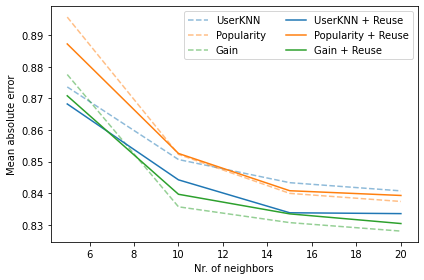

In [65]:
plt.figure(figsize=(6, 4))
plt.plot(results["K"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["K"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["K"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["K"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["K"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["K"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.xlabel("Nr. of neighbors")
plt.ylabel("Mean absolute error")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/k_vs_mae.png", dpi=300)

## exposure vs. utility

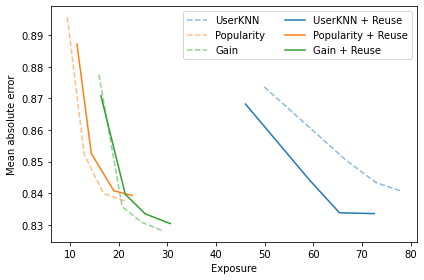

In [66]:
plt.figure(figsize=(6, 4))
plt.plot(results["exp_userknn"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["exp_pop"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["exp_gain"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["exp_userknn_reuse"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["exp_pop_reuse"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["exp_gain_reuse"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Mean absolute error")
plt.xlabel("Exposure")
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("plots/" + name + "/exposure_vs_mae.png", dpi=300)

# fraction of vulnerable users

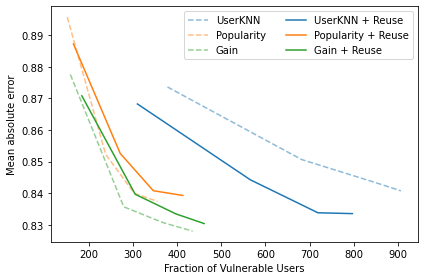

In [67]:
plt.plot(results["vfrac_userknn"], results["mae_userknn"], color="C0", linestyle="dashed", label="UserKNN", alpha=0.5)
plt.plot(results["vfrac_pop"], results["mae_pop"], color="C1", linestyle="dashed", label="Popularity", alpha=0.5)
plt.plot(results["vfrac_gain"], results["mae_gain"], color="C2", linestyle="dashed", label="Gain", alpha=0.5)
plt.plot(results["vfrac_userknn_reuse"], results["mae_userknn_reuse"], color="C0", linestyle="solid", label="UserKNN + Reuse")
plt.plot(results["vfrac_pop_reuse"], results["mae_pop_reuse"], color="C1", linestyle="solid", label="Popularity + Reuse")
plt.plot(results["vfrac_gain_reuse"], results["mae_gain_reuse"], color="C2", linestyle="solid", label="Gain + Reuse")
plt.ylabel("Mean absolute error")
plt.xlabel("Fraction of Vulnerable Users")
plt.legend(ncol=2)
plt.tight_layout()
#plt.savefig("plots/" + name + "/hoover_vs_k.png", dpi=300)

In [68]:
ml100k_results = load_data("ml-100k")
ml1m_results = ml100k_results#load_data("ml-1m")
jester_results = ml100k_results#load_data("jester")
goodreads_results = ml100k_results#load_data("goodreads")

In [69]:
def plot_exposure(ax, results):
    ax.plot(results["mae_userknn"], results["exp_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_pop"], results["exp_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_gain"], results["exp_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_userknn_reuse"], results["exp_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["mae_pop_reuse"], results["exp_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["mae_gain_reuse"], results["exp_gain_reuse"], color="C2", linestyle="solid")

def plot_vulnerables(ax, results):
    ax.plot(results["mae_userknn"], results["vfrac_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_pop"], results["vfrac_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_gain"], results["vfrac_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_userknn_reuse"], results["vfrac_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["mae_pop_reuse"], results["vfrac_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["mae_gain_reuse"], results["vfrac_gain_reuse"], color="C2", linestyle="solid")

In [70]:
%matplotlib qt

In [72]:
fig, axes = plt.subplots(2, 4, figsize=(6, 2), sharex=True)
plot_exposure(axes[0, 0], ml100k_results)
plot_exposure(axes[0, 1], ml1m_results)
plot_exposure(axes[0, 2], jester_results)
plot_exposure(axes[0, 3], goodreads_results)

plot_vulnerables(axes[1, 0], ml100k_results)
plot_vulnerables(axes[1, 1], ml1m_results)
plot_vulnerables(axes[1, 2], jester_results)
plot_vulnerables(axes[1, 3], goodreads_results)

axes[0, 0].set_ylabel("Avg. Exposure")
axes[1, 0].set_xlabel("Mean absolute error")
axes[1, 1].set_xlabel("Mean absolute error")
axes[1, 2].set_xlabel("Mean absolute error")
axes[1, 3].set_xlabel("Mean absolute error")
axes[1, 0].set_ylabel("Frac. Vulnerables")
axes[0, 0].set_title("MovieLens 100k")
axes[0, 1].set_title("MovieLens 1M")
axes[0, 2].set_title("Jester")
axes[0, 3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

In [10]:
df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
df = df.sample(frac=0.8)
df.groupby("user_id").size().std()

443.58200921737136

In [12]:
df.groupby("user_id").size().sort_values()

user_id
470623      12
501121      14
637741      14
779263      14
850896      14
          ... 
208256    3680
193527    4339
271607    5159
422414    5591
145834    6420
Length: 2500, dtype: int64